<a href="https://colab.research.google.com/github/Hasanen99/ML-Homeworks-AIDOJO/blob/main/Assignments_4_Hasanen_A_Sahib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Assignment 04: Deep Learning Algorithms 

This Week's assignment is to train Deep Learning and Machine Learning algorithms on the `fashion_mnist` images dataset to accurately predict the type of clothes in the image.

Before starting copy this file and work on your own copy by following the below steps: 
`File > Save Copy in Drive`. Then add your name to the file (e.g., Assignment 04: Deep Learning - Muntadher Alkaabi).


**Submission Deadline: Thursday, 2/10/2022 at 3:00 PM**

**Requirements:**

1. Import all necessary libraries for the machine learning project.
2. Download the dataset using `tf.keras.datasets`.
3. Make sure the pixels values are scaled between (`0-1`).
4. Make sure to convert the target into one hot vector.
5. Train six different Machine Learning models (`KNN`, `Logistics Regression`, `Support Vector Machine`, `Decision Tree`, `Random Forest`, `DNN`).


6. Make sure to achieve the following results for the testing data:
<br> Accuracy equal or above "95%", and Loss equal or below "0.1". 
7. Plot the loss and validation loss values from the training history of the DNN model.
8. Use the right evaluation metrics to choose the best model (write down your choice of the best model).


**Note:** To get the best performance from the model, manually tune the hyperparameters of each model.

Find relevant links below:

[Submission Form](https://docs.google.com/forms/d/e/1FAIpQLScPUIMjrlCk9Px0ioSE9xLViJO9r-Q1EymwXxXcJmQuHmIEHA/viewform?usp=pp_url)

Good luck and feel free to ask any questions in the or on the Questions channel.

# 1- Import all necessary libraries for the machine learning project.

In [ ]:
# import the necessary libraries
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import seaborn as sns

%matplotlib inline

# 2- Download the dataset using tf.keras.dataset

In [ ]:
# download the required dataset
(x_train, y_train), (x_test, y_test)=keras.datasets.fashion_mnist.load_data()

In [ ]:
x_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

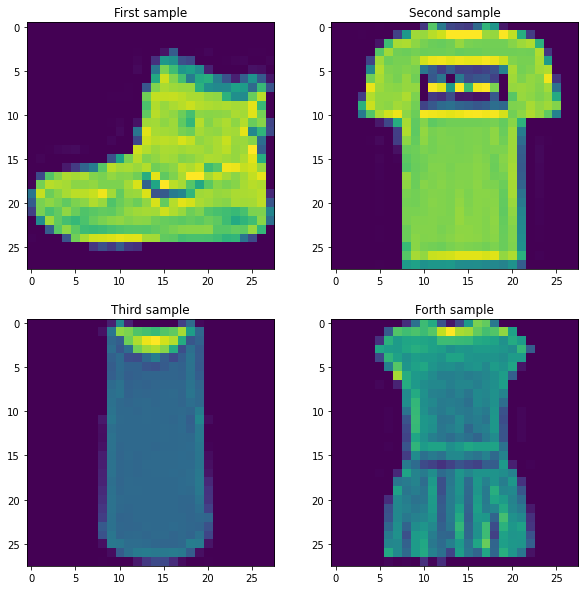

In [ ]:
from IPython.core.pylabtools import figsize
# plot image samples from the dataset 
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.title('First sample')
plt.imshow(x_train[0])

plt.subplot(2,2,2)
plt.title('Second sample')
plt.imshow(x_train[1])

plt.subplot(2,2,3)
plt.title('Third sample')
plt.imshow(x_train[2])

plt.subplot(2,2,4)
plt.title('Forth sample')
plt.imshow(x_train[3])
plt.show()

In [ ]:
# check the shape of the following (x_train, y_train and x_test, y_test)
print(f'Shape of X train:{x_train.shape}\nShape of X test:{x_test.shape}\nShape of Y train:{y_train.shape}\nShape of Y test:{y_test.shape}\n')


Shape of X train:(60000, 28, 28)
Shape of X test:(10000, 28, 28)
Shape of Y train:(60000,)
Shape of Y test:(10000,)



In [ ]:
#Finding how many classes does we have
print(f'Number of classes: {len(set(y_train))}')

Number of classes: 10


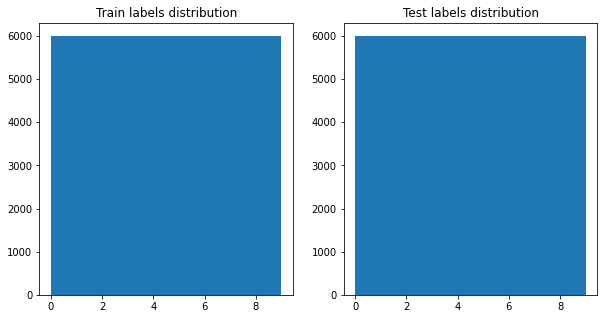

In [ ]:
# plot the histogram of the target from the training and testing distribution 
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title('Train labels distribution')
plt.hist(y_train)

plt.subplot(1,2,2)
plt.title('Test labels distribution')
plt.hist(y_train)
plt.show()

##Giving a suitable clear name for each label 

In [ ]:
y_names={0:'T-shirt/top',
1:'Trouser',
2:'Pullover',
3:'Dress',
4:'Coat',
5:'Sandal',
6:'Shirt',
7:'Sneaker',
8:'Bag',
9:'Ankle boot'}

# 3- Make sure the pixels values are scaled between (0-1)

In [ ]:
# before scaling, find the range of numerics in each sample 
print(f'Minimum vale in sample:{x_train[0].min()}\nMax vale in sample:{x_train[0].max()}')

Minimum vale in sample:0
Max vale in sample:255


In [ ]:
# scale the pixels values between 0-1

#due it is images (intensity between 0 - 255) we can simply deviding by 255
x_train=x_train/255.0
x_test=x_test/255.0

#The new range
print(f'Minimum vale in sample:{x_train[0].min()}\nMax vale in sample:{x_train[0].max()}')

Minimum vale in sample:0.0
Max vale in sample:1.0


In [ ]:
# convert the images into vectors
x_train_flat = x_train.reshape(-1,28*28) #put all elements on columns (in other word flatten the matrix contain 28*28 elements)
x_test_flat = x_test.reshape(-1,28*28)

# 4- Make sure to convert the target into one hot vector

In [ ]:
# encode the training and testing target into one hot vector
y_train_hot=tf.one_hot(y_train,depth=len(set(y_train)))
y_test_hot=tf.one_hot(y_test,depth=len(set(y_train)))


# 5- Modeling
Train six different models (KNN, Logistics Regression, Support Vector Machine, Decision Tree, Random Forest, DNN)


**Note:**
1. Make sure to saperate each model in a new sub-section.
2. Make sure to achieve the following results for the testing data: 
<br> Accuracy equal or above "95%", and Loss equal or below "0.1".
3. Plot the loss and validation loss values from the training history of the DNN model.
4. Use the right evaluation metrics to choose the best model (write down your choice of the best model).

## KNN Model

In [ ]:
# build the model
M_knn = KNeighborsClassifier(n_neighbors=3)
M_knn.fit(x_train_flat,y_train_hot) #also we can use the direct y_train for labels, but just for testing we used the one_hot one.

KNeighborsClassifier(n_neighbors=3)

In [ ]:
yp_knn=M_knn.predict(x_test_flat)

Test see any test sample, how model predicted it

Trouser
True class:1
predicted as:1


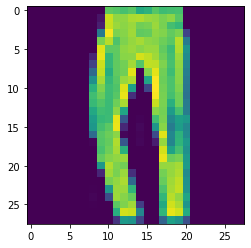

In [ ]:
i=5
plt.imshow(x_test[i])
print(f'{y_names[np.argmax(yp_knn[i])]}\nTrue class:{y_test[i]}\npredicted as:{np.argmax(yp_knn[i])}')

##Logistic Regression

In [ ]:
M_LR=LogisticRegression(random_state=42,multi_class='multinomial')
M_LR.fit(x_train_flat,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression(multi_class='multinomial', random_state=42)

In [ ]:
yp_LR=M_LR.predict(x_test_flat)

##Support Vector Machine

In [ ]:

M_SVM=OneVsRestClassifier(LinearSVC(random_state=42,multi_class="ovr",max_iter=-1))
M_SVM.fit(x_train_flat,y_train)


In [ ]:
yp_SVM=M_SVM.predict(x_test_flat)

##Decision Tree

In [ ]:
M_DT= tree.DecisionTreeClassifier(random_state=42)
M_DT.fit(x_train_flat, y_train)

yp_DT=M_DT.predict(x_test_flat)

##Random Forest

In [ ]:
M_RF = RandomForestClassifier(max_depth=100, random_state=42)
M_RF.fit(x_train_flat,y_train)

yp_RF=M_RF.predict(x_test_flat)

##DNN

In [ ]:
x_train_flat[0].shape

(784,)

In [ ]:
keras.backend.clear_session()

input_L=keras.layers.Input(shape=(784))
L1=keras.layers.Dense(512,tf.nn.leaky_relu,kernel_initializer=tf.initializers.HeUniform(seed=42),name='L1')(input_L)
drop1=keras.layers.Dropout(0.3,name='Drop1')(L1)
L2=keras.layers.Dense(256,tf.nn.leaky_relu,kernel_initializer=tf.initializers.HeUniform(seed=42),name='L2')(drop1)
drop2=keras.layers.Dropout(0.3,name='Drop2')(L2)
L3=keras.layers.Dense(128,tf.nn.leaky_relu,kernel_initializer=tf.initializers.HeUniform(seed=42),name='L3')(drop2)
drop3=keras.layers.Dropout(0.3,name='drop3')(L3)
conc1=keras.layers.concatenate([input_L,drop3],name='Concatenate1')

L4=keras.layers.Dense(64,tf.nn.leaky_relu,kernel_initializer=tf.initializers.HeUniform(seed=42),name='L4')(conc1)
drop4=keras.layers.Dropout(0.3,name='drop4')(L4)
L5=keras.layers.Dense(32,tf.nn.leaky_relu,kernel_initializer=tf.initializers.HeUniform(seed=42),name='L5')(drop4)
drop5=keras.layers.Dropout(0.3,name='drop5')(L5)
# L6=keras.layers.Dense(256,tf.nn.leaky_relu,name='L6')(drop5)
# drop6=keras.layers.Dropout(0.3,name='drop6')(L6)
conc2=keras.layers.concatenate([conc1,drop5],name='Concatenate2')

out=keras.layers.Dense(10,'softmax',name='OutLayer')(conc2)

In [ ]:
M_DNN=keras.Model(inputs=[input_L],outputs=[out])

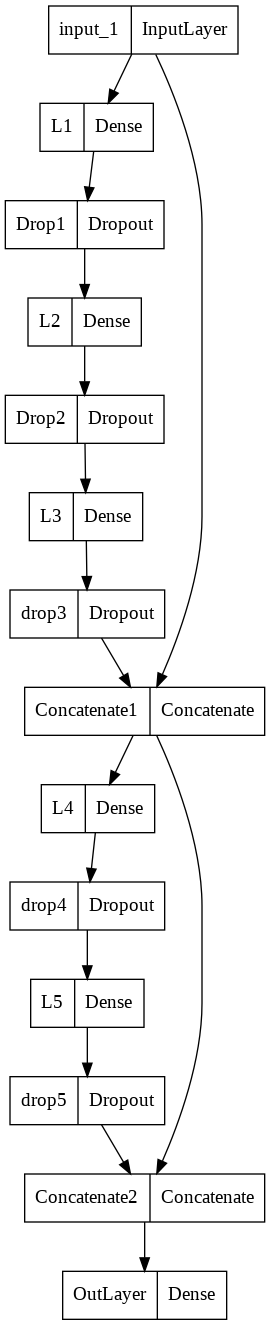

In [ ]:
keras.utils.plot_model(M_DNN) 

In [ ]:
M_DNN.compile(tf.optimizers.Adam(),loss=tf.losses.CategoricalCrossentropy(),metrics=['acc'])

In [ ]:
history1=M_DNN.fit(x_train_flat,y_train_hot,epochs=10,batch_size=32,validation_data=(x_test_flat,y_test_hot))

Epoch 1/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.3330 - acc: 0.8793 - val_loss: 0.3934 - val_acc: 0.8579
Epoch 2/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.3299 - acc: 0.8792 - val_loss: 0.3685 - val_acc: 0.8726
Epoch 3/10
1875/1875 [==============================] - 31s 17ms/step - loss: 0.3249 - acc: 0.8818 - val_loss: 0.3810 - val_acc: 0.8608
Epoch 4/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.3203 - acc: 0.8836 - val_loss: 0.3727 - val_acc: 0.8694
Epoch 5/10
1875/1875 [==============================] - 23s 13ms/step - loss: 0.3198 - acc: 0.8830 - val_loss: 0.3764 - val_acc: 0.8716
Epoch 6/10
1875/1875 [==============================] - 23s 13ms/step - loss: 0.3126 - acc: 0.8849 - val_loss: 0.3870 - val_acc: 0.8640
Epoch 7/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.3146 - acc: 0.8837 - val_loss: 0.3690 - val_acc: 0.8684
Epoch 8/10
1875/1875 [==========================

In [ ]:
yp_FDNN=M_DNN.predict(x_test_flat)

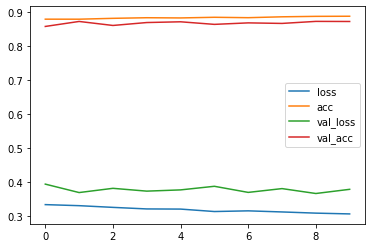

In [ ]:
pd.DataFrame(history1.history).plot()

##Sequential DNN

In [ ]:
keras.backend.clear_session()

input_L=keras.layers.Input(shape=(784))
M_DNN_seq = keras.models.Sequential([
    keras.layers.Dense(512, input_shape=(784,)),
    keras.layers.Dense(256,activation=tf.nn.leaky_relu,kernel_initializer=tf.initializers.HeUniform(seed=42)),
    keras.layers.Dense(128,activation=tf.nn.leaky_relu,kernel_initializer=tf.initializers.HeUniform(seed=42)),
    keras.layers.Dense(64,activation=tf.nn.leaky_relu,kernel_initializer=tf.initializers.HeUniform(seed=42)),
    
    keras.layers.Dense(10,activation=tf.nn.softmax),
])

M_DNN_seq.compile(tf.optimizers.Adam(),loss=tf.losses.CategoricalCrossentropy(),metrics=['acc'])
hist2=M_DNN_seq.fit(x_train_flat,y_train_hot,epochs=10,batch_size=32,validation_data=(x_test_flat,y_test_hot))

Epoch 1/10
1875/1875 [==============================] - 18s 9ms/step - loss: 0.5151 - acc: 0.8125 - val_loss: 0.4448 - val_acc: 0.8396
Epoch 2/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.4117 - acc: 0.8505 - val_loss: 0.4487 - val_acc: 0.8487
Epoch 3/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.3805 - acc: 0.8614 - val_loss: 0.4324 - val_acc: 0.8478
Epoch 4/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.3568 - acc: 0.8681 - val_loss: 0.3742 - val_acc: 0.8661
Epoch 5/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.3420 - acc: 0.8735 - val_loss: 0.4044 - val_acc: 0.8585
Epoch 6/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.3311 - acc: 0.8771 - val_loss: 0.3920 - val_acc: 0.8651
Epoch 7/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.3169 - acc: 0.8821 - val_loss: 0.3842 - val_acc: 0.8631
Epoch 8/10
1875/1875 [==============================] -

In [ ]:
yp_SDNN=M_DNN_seq.predict(x_test_flat)

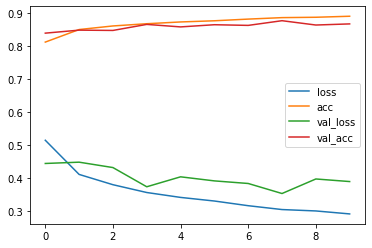

In [ ]:
pd.DataFrame(hist2.history).plot()

## Model evaluation

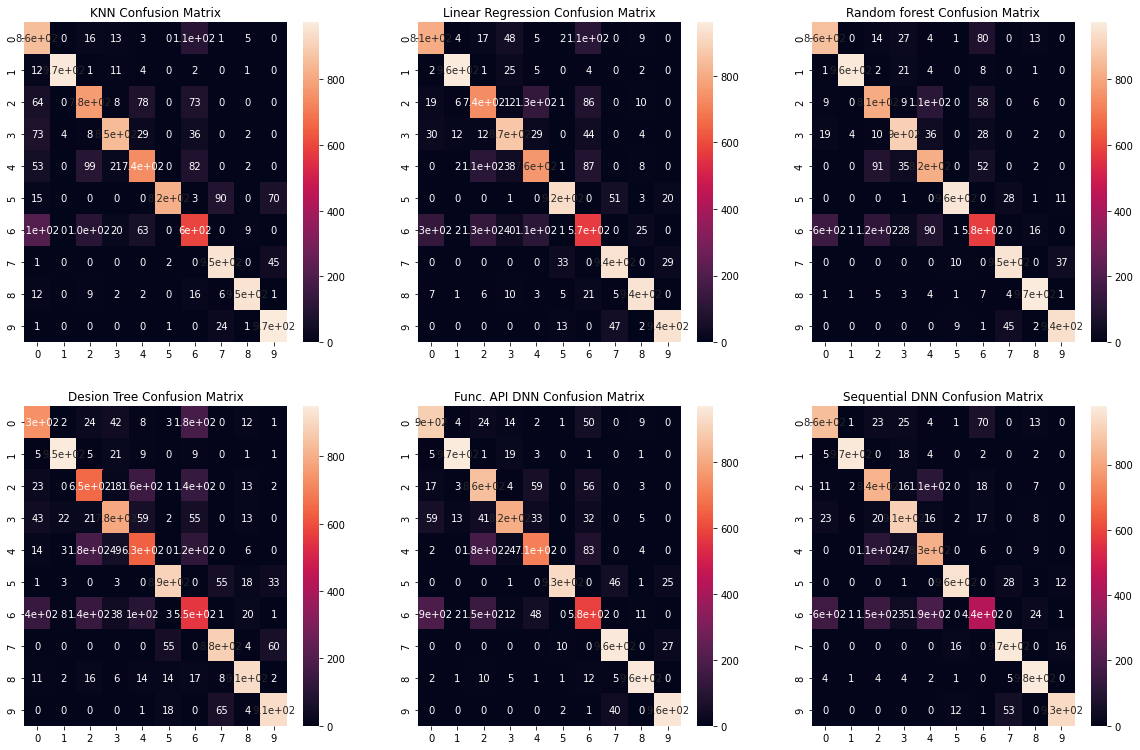

In [ ]:
# evaluate the model


plt.figure(figsize=(20,20))
plt.subplot(3,3,1)
plt.title('KNN Confusion Matrix')
CM1=metrics.confusion_matrix(y_test,np.argmax(yp_knn,axis=1))  
sns.heatmap(CM1, annot=True)

plt.subplot(3,3,2)
plt.title('Linear Regression Confusion Matrix')
CM2=metrics.confusion_matrix(y_test,yp_LR)  
sns.heatmap(CM2, annot=True)

plt.subplot(3,3,3)
plt.title('Random forest Confusion Matrix')
CM3=metrics.confusion_matrix(y_test,yp_RF)  
sns.heatmap(CM3, annot=True)

plt.subplot(3,3,4)
plt.title('Desion Tree Confusion Matrix')
CM4=metrics.confusion_matrix(y_test,yp_DT)  
sns.heatmap(CM4, annot=True)

plt.subplot(3,3,5)
plt.title('Func. API DNN Confusion Matrix')
CM5=metrics.confusion_matrix(y_test,np.argmax(yp_FDNN,axis=1))  
sns.heatmap(CM5, annot=True)

plt.subplot(3,3,6)
plt.title('Sequential DNN Confusion Matrix')
CM6=metrics.confusion_matrix(y_test,np.argmax(yp_SDNN,axis=1))  
sns.heatmap(CM6, annot=True)

In [ ]:
Allms={'Accuracy':[metrics.accuracy_score(y_test, np.argmax(yp_knn,axis=1)),metrics.accuracy_score(y_test, yp_LR),metrics.accuracy_score(y_test, yp_DT),metrics.accuracy_score(y_test, yp_RF),metrics.accuracy_score(y_test, yp_SVM),M_DNN.evaluate(x_test_flat,y_test_hot,verbose=0)[1],M_DNN_seq.evaluate(x_test_flat,y_test_hot,verbose=0)[1]],
       'F1-macro':[metrics.f1_score(y_test,np.argmax(yp_knn,axis=1),average='macro'),metrics.f1_score(y_test,yp_LR,average='macro'),metrics.f1_score(y_test,yp_DT,average='macro'),metrics.f1_score(y_test,yp_RF,average='macro'),metrics.f1_score(y_test,yp_SVM,average='macro'),metrics.f1_score(y_test,np.argmax(yp_FDNN,axis=1),average='macro'),metrics.f1_score(y_test,np.argmax(yp_SDNN,axis=1),average='macro')],
       'F1-micro':[metrics.f1_score(y_test,np.argmax(yp_knn,axis=1),average='micro'),metrics.f1_score(y_test,yp_LR,average='micro'),metrics.f1_score(y_test,yp_DT,average='micro'),metrics.f1_score(y_test,yp_RF,average='micro'),metrics.f1_score(y_test,yp_SVM,average='micro'),metrics.f1_score(y_test,np.argmax(yp_FDNN,axis=1),average='micro'),metrics.f1_score(y_test,np.argmax(yp_SDNN,axis=1),average='micro')],
       'F1-weighted':[metrics.f1_score(y_test,np.argmax(yp_knn,axis=1),average='weighted'),metrics.f1_score(y_test,yp_LR,average='weighted'),metrics.f1_score(y_test,yp_DT,average='weighted'),metrics.f1_score(y_test,yp_RF,average='weighted'),metrics.f1_score(y_test,yp_SVM,average='weighted'),metrics.f1_score(y_test,np.argmax(yp_FDNN,axis=1),average='weighted'),metrics.f1_score(y_test,np.argmax(yp_SDNN,axis=1),average='weighted')]
       }

Met_DF=pd.DataFrame(Allms,index=['KNN','Logistic Regression','Dession Tree','Random Forest','SVM','Func. API DNN','Seq. DNN'])
Met_DF

,Accuracy,F1-macro,F1-micro,F1-weighted
KNN,0.8487,0.849297,0.8487,0.849297
Logistic Regression,0.8439,0.843111,0.8439,0.843111
Dession Tree,0.7888,0.789665,0.7888,0.789665
Random Forest,0.8764,0.874918,0.8764,0.874918
SVM,0.1038,0.103800,0.1038,0.103800
Func. API DNN,0.8725,0.863564,0.8645,0.863564
Seq. DNN,0.8676,0.862082,0.8676,0.862082


##Results:
Based on the accuracy and F1 score supported by its cofusion matrix, the best model is the **Random Forest**.